<a href="https://colab.research.google.com/github/Tejaswini1309/Satellite-Imagery-Based-Property-Valuation/blob/main/eda_and_baseline_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once Google Drive is mounted, you can specify the path to your file. For example, if you have a CSV file named `my_data.csv` in the root of your Google Drive, you can load it like this:

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/project_cdc/train1.csv'
df = pd.read_csv(file_path)
display(df.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#we have 21 features
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#target variable
y = df.price

In [ ]:
#out of the 21 features we have a feature date which is of object type which gives us the information about when the house was sold in year , month , date and
# time format , we extract year and month from it and ignore the rest two as they might not have a lot of influence on the price
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [ ]:
df['date'].value_counts()

,count
date,
20140623T000000,115
20140625T000000,99
20150325T000000,94
20150421T000000,93
20140626T000000,93
...,...
20141128T000000,1
20141227T000000,1
20141102T000000,1


In [ ]:
# extracting year and month from date
# also we have yr_built and yr_renovated in our dataset , they alone are quite informative features but having a feature
# for house age is also a very informative one so we make house feature by subtracting yr_renovated - yr_built
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year_bought'] = df['date'].dt.year
df['month_bought'] = df['date'].dt.month
df['house_age'] = df['yr_renovated']-df['yr_built']

In [ ]:
#removing the date column after that
df.drop(columns=['date'], inplace=True)

In [ ]:
#new features
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_bought', 'month_bought',
       'house_age'],
      dtype='object')

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_bought,month_bought,house_age
0,9117000170,268643,4,2.25,1810,9240,2.0,0,0,3,...,1961,0,98055,47.4362,-122.187,1660,9240,2015,5,-1961
1,6700390210,245000,3,2.50,1600,2788,2.0,0,0,4,...,1992,0,98031,47.4034,-122.187,1720,3605,2014,7,-1992
2,7212660540,200000,4,2.50,1720,8638,2.0,0,0,3,...,1994,0,98003,47.2704,-122.313,1870,7455,2015,1,-1994
3,8562780200,352499,2,2.25,1240,705,2.0,0,0,3,...,2009,0,98027,47.5321,-122.073,1240,750,2015,4,-2009
4,7760400350,232000,3,2.00,1280,13356,1.0,0,0,3,...,1994,0,98042,47.3715,-122.074,1590,8071,2014,12,-1994


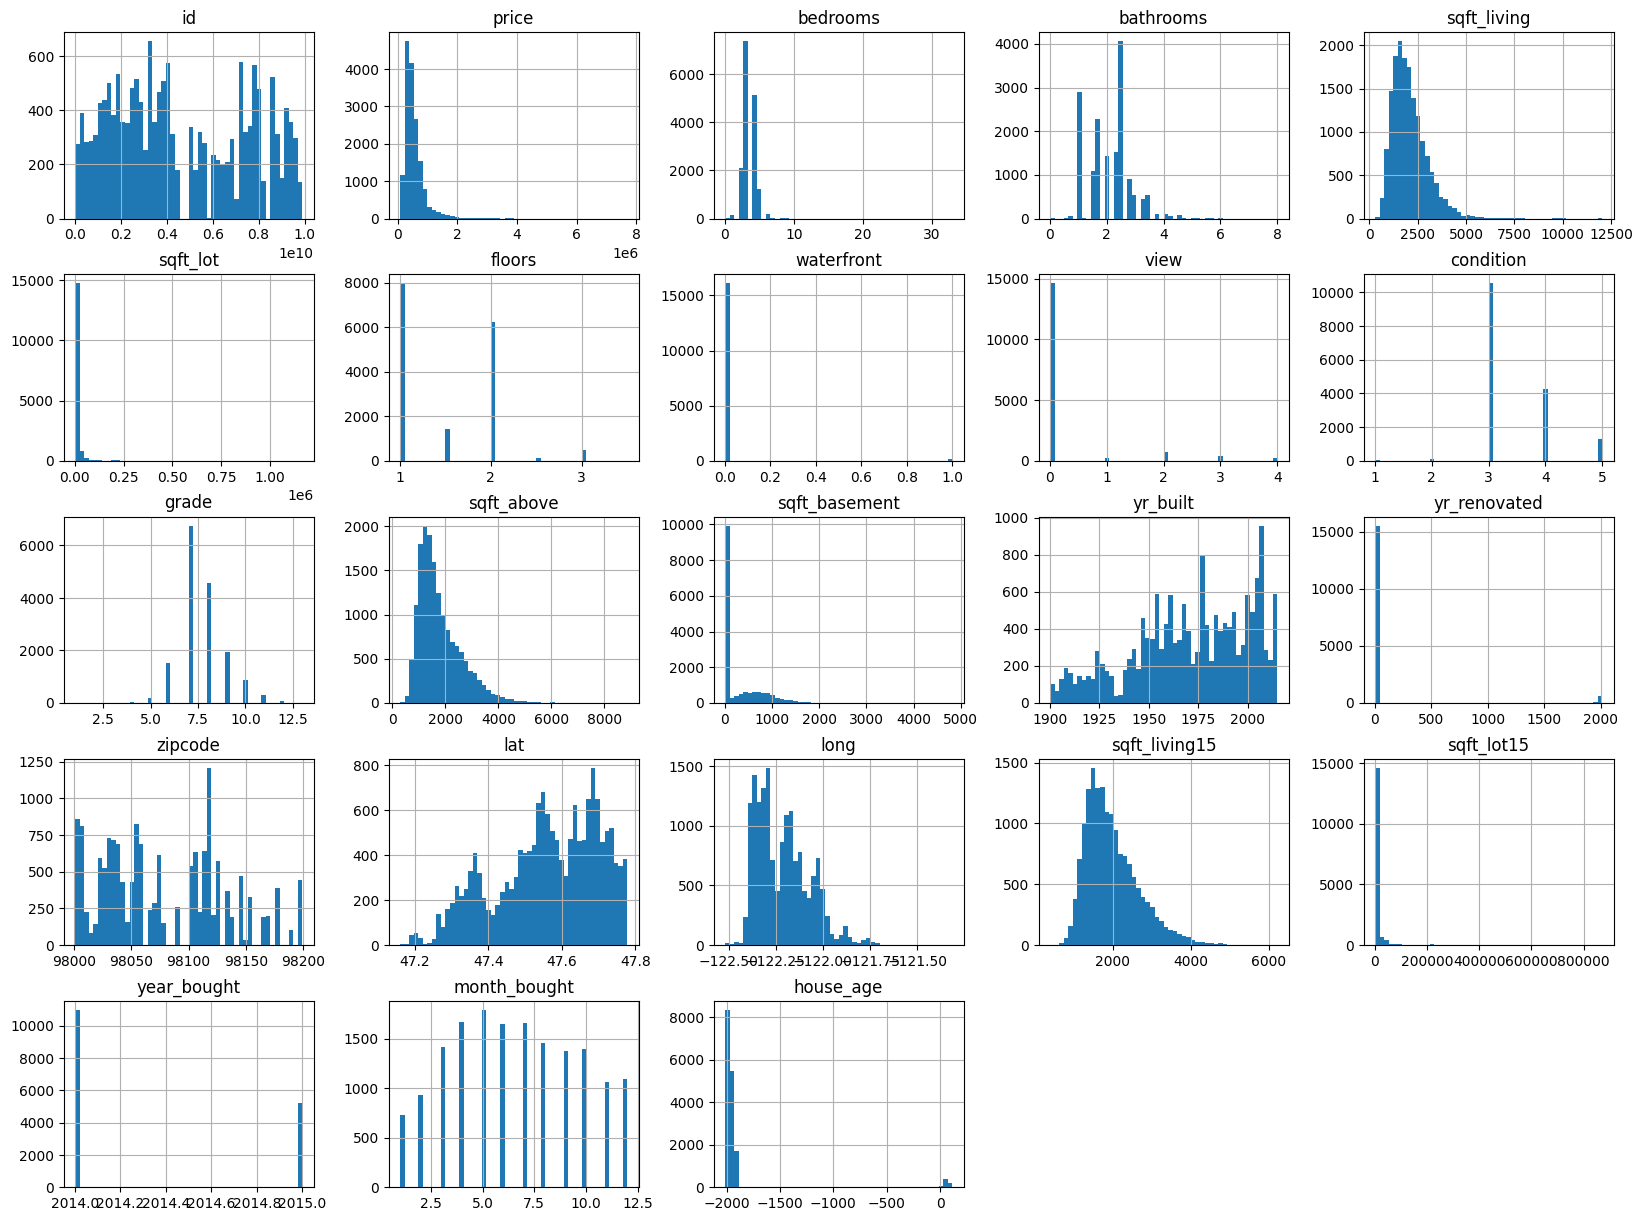

In [ ]:
#histogram of each feature
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_bought', 'month_bought',
       'house_age'],
      dtype='object')

In [ ]:
#all features other than price to segregate our independent variables from the dataset
df_features = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_bought', 'month_bought','house_age']

In [ ]:
#independent features
X = df[df_features]

In [ ]:
#splitting the datset into train and val(test)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=1)

In [ ]:
X_train.shape

(12156, 22)

In [ ]:
X_val.shape

(4053, 22)

In [ ]:
#for further data analysis we make a copy of the train data set so that we make no changes to the original data
ex = X_train.copy()

In [ ]:
#adding price to it
ex['price']=y_train.values

<Axes: xlabel='long', ylabel='lat'>

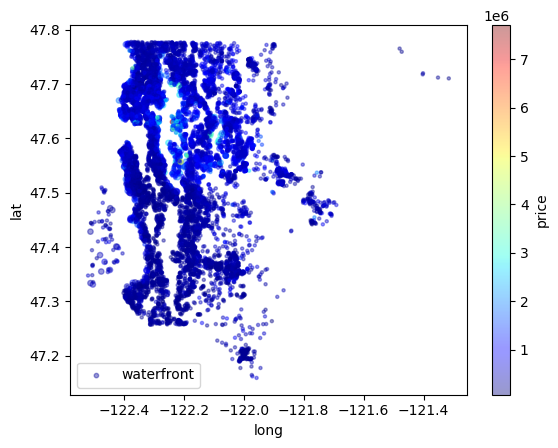

In [ ]:
#this is a plot between lat and long , the intensity of color indicates the price ( blue [low] -> red [high]) and the radius of the dots show us waterfront
# magnitude in that region
ex.plot(
    kind="scatter",
    x="long",
    y="lat",
    alpha=0.4,
    s=ex['waterfront']*10+5,
    label = 'waterfront',
    c='price',
    cmap='jet'
)


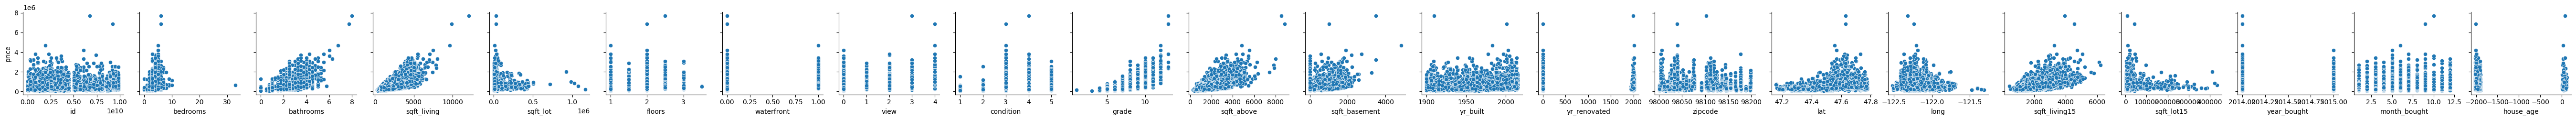

In [ ]:
#all features other than price plotted against price , this gives us an idea of the correleation between prices and the features
import seaborn as sns
target = 'price'
sns.pairplot(data=ex,x_vars=df_features,y_vars=[target],kind='scatter')
plt.show()

In [ ]:
# the correlation between price and the features
corr_matrix = ex.corr()
corr_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.700255
grade,0.668470
sqft_above,0.599769
sqft_living15,0.586629
bathrooms,0.530931
view,0.394552
sqft_basement,0.320422
lat,0.309012
bedrooms,0.300996


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#scaling the features and the price
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
price_scaler = StandardScaler()
y_train_scaled = price_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = price_scaler.transform(y_val.values.reshape(-1, 1))

In [ ]:
# first we will try to predict values using linear regression , so importing
# the model from sklearn and finding rmse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train_scaled,y_train_scaled)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_val_scaled)

In [ ]:
import numpy as np
mse = mean_squared_error(y_val_scaled,y_pred)
rmse = np.sqrt(mse)
rmse
rmse*price_scaler.scale_[0]
# for linear regression the val rmse turned out to be 207419.
#np.float64(0.5855988796231023) rmse

np.float64(207419.2746519881)

In [ ]:
#re for lr
r2 = r2_score(y_val_scaled, y_pred)
print(r2)

0.698842759544339


In [ ]:
df['zipcode'].value_counts()

,count
zipcode,
98103,458
98038,449
98115,437
98117,434
98052,429
...,...
98102,79
98010,75
98024,59


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=20,
    random_state=1
)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, random_state=1)

In [ ]:
y_pred = dt.predict(X_val)

In [ ]:
# tree depth 10
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
rmse

# using decision tree the rmse is 198k for tree depth 10 and min samples in leaf 20

np.float64(197798.47245839343)

In [ ]:
#r2 for decision tree
r2 = r2_score(y_val, y_pred)
print(r2)

0.7261322124939765


In [ ]:
#even if depth is increased drastically / min leafs changed best rmse is around 180-190k with decision tree
dt = DecisionTreeRegressor(
    max_depth=50,
    min_samples_leaf=25,
    random_state=1
)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
rmse

np.float64(186146.01956291718)

In [ ]:
#r2 error for decision tree
r2 = r2_score(y_val, y_pred)
print(r2)

0.7574492652761695


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=10,
    random_state=1,
    n_jobs=-1
)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
rmse
# with random forest after a few tweaks ( diff depths , min leaf samples size) the rmse is around 160k

np.float64(160583.8135734453)

In [ ]:
#re error for random forest
r2 = r2_score(y_val, y_pred)
print(r2)

0.8194910992810133


In [ ]:
#using nn with two hidden layers the error is around 180-185k
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(128,64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=300,
    random_state=1
)
mlp.fit(X_train_scaled,y_train_scaled)
y_pred = mlp.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val_scaled,y_pred))
rmse*price_scaler.scale_[0]
#rmse=np.float64(0.4114450146320503)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


np.float64(145733.9306200232)

In [ ]:

r2 = r2_score(y_val_scaled, y_pred)
print(r2)

0.8513323612788274


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor


In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)


In [ ]:
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(rmse)
# rmse with xgboost is around 137k
r2 = r2_score(y_val, y_pred)
print(r2)


139585.1664325404
0.8636127710342407
